In [ ]:
#feature of breams (특징, 특성)
#unit: cm
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
#unit: g
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#feature of smelt
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length=bream_length+smelt_length
fish_weight=bream_weight+smelt_weight

import numpy as np
fish_data=np.column_stack((fish_length, fish_weight))
print(fish_data)
#이거랑 다른게 뭐지? -> numpy배열을 리턴하느냐 아니냐
# fish_data=[[i, k] for i, k in zip(fish_length, fish_weight)]
# print(fish_data)
#두 배열을 하나로 이어주는 concatenate함수, 0, 1로 구성된 배열을 만드는 ones, zeros
fish_target=np.concatenate((np.ones(35), np.zeros(14)))

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
from sklearn.model_selection import train_test_split

#fish_data에서 두 개, fish_target에서 두 개 총 네 개의 배열 반환
train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target, random_state=42)

#위에서 column_stack을 사용 안하고 for문을 사용하면 일반 배열로 리턴
#-> 이러한 작업 필요해짐(list to numpy array)
# train_input=np.array(train_input)
# test_input=np.array(test_input)
# train_input=np.array(train_target)
# test_target=np.array(test_target)

#train_test_split은 test샘플을 25%비율로 반환 - 13개
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

#도미로 샘플링 편향(샘플 개수가 적을 때 발생 빈도 높음)
print(test_target)
#stratify 매개변수에 타겟 데이터 전달 -> 클래스의 비율에 맞게 나눈다.(샘플 개수 적을 때 유용)
train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#훈련
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

print(kn.predict([[25, 150]]))

1.0
[0.]


[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]] [[1. 0. 0. 0. 0.]]


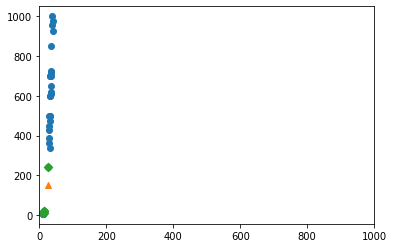

In [ ]:
import matplotlib.pyplot as plt

#x축, y축 데이터 설정
plt.scatter(train_input[:, 0], train_input[:, 1])
#새로운 데이터 확인(세모 마커)
plt.scatter(25, 150, marker="^")

#5개(default)의 neighbors에 대한 정보 반환
#distances: 거리, indexes: 가까운 neighbors의 index
distances, indexes=kn.kneighbors([[25, 150]])

#앞서 배운 numpy 인덱싱을 통한 5개의 neighbors를 plt에 추가
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")
#왜 오류?
plt.xlabel="length"
# plt.xlabel('length')
# plt.ylabel('weight')

#가장 가까운 데이터 확인 - 도미 1, 빙어 4(거리 기반 알고리즘)
print(train_input[indexes], train_target[indexes])

#x축 데이터 범위를 y축과 맞추기
plt.xlim((0, 1000))
plt.show()


In [ ]:
#평균
#axis가 0: 길이는 길이끼리, 무게는 무게끼리 계산(각 열 계산)
mean=np.mean(train_input, axis=0)
#표준편차
std=np.std(train_input, axis=0)

#평균 [길이, 무게], 표준편차 [길이, 무게]
print(mean, std)

#(데이터-평균)/표준편차 = 표준 점수(원점에서 얼마나 떨어져 있는가?)
#train_input의 모든 행에 자동으로 적용
train_scaled=(train_input-mean)/std

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


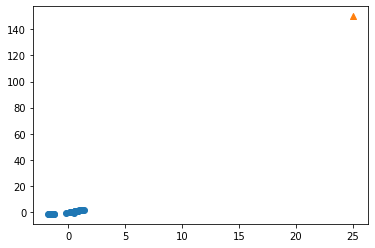

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker="^")
plt.show()

#현재 train_scaled는 평균을 빼고 표준편차로 나눈 값이므로, 새로운 데이터와의 값이 다르다.

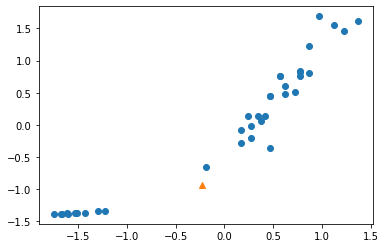

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
#새로운 데이터도 동일한 기준으로 바꾸기
new=([25, 150]-mean)/std
plt.scatter(new[0], new[1], marker="^")
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

#테스트 샘플도 같은 기준으로 변환
test_scaled=(test_input-mean)/std

print(kn.score(test_scaled, test_target))
print(kn.predict([new]))

1.0
[1.]


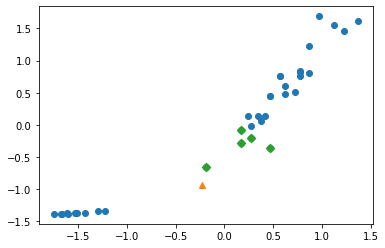

In [ ]:
distances, indexes=kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker="D")

#데이터의 scale이 다르면 전처리가 필요하다.
#예제에서는 길이보다 무게에 의해 값이 좌지우지 -> 스케일이 더 크다.